# Florance Airbnb Analysis

In this notebook we will try to analyse Florance Airbnb listing and answer some quesions


## Table of Contents

I. [Load and explore the Data](#Load-the-Data)<br> 
II. [Question I: What are the sub ratings that highly correlate to total rating?](#Question-I)<br>
III. [Question II: What are the neighborhoods the highest average prices?](#Question-II)<br>
IV. [Question III: What is the time of the year has the highest rental prices?](#Question-III)<br>

### Load necessary libraries

In [378]:
import pandas as pd
import seaborn as sns
from matplotlib import cm, pyplot as plt
import numpy as np 
%matplotlib inline

### <a class="anchor" id="Load-the-Data">Load and explore the Data</a>

In [379]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

In [380]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,285563,2019-06-22,f,$130.00,$130.00,1,90
1,24469,2019-06-22,t,$80.00,$80.00,2,365
2,24469,2019-06-23,t,$80.00,$80.00,2,365
3,24469,2019-06-24,t,$80.00,$80.00,2,365
4,24469,2019-06-25,t,$80.00,$80.00,2,365


In [381]:
pd.set_option('display.max_columns', None)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24469,https://www.airbnb.com/rooms/24469,20190622031149,2019-06-22,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",Located on the first floor of a 19th century t...,"Apartment, perfect for 2 people, wide, bright ...",none,In 10/15 minutes walking or with only one stop...,NaN,"We do not have private parking, but we are off...",NaN,Benedetta and Lorenzo will be happy to welcome...,"I nostri ospiti sono i benvenuti, chiediamo di...",NaN,NaN,https://a0.muscache.com/im/pictures/fd822ef3-4...,NaN,99178,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy","Hi, my name is Benedetta and together with my ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/99178/profile...,https://a0.muscache.com/im/users/99178/profile...,San Jacopino,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Florence, Tuscany, Italy",Centro Storico,Centro Storico,NaN,Florence,Tuscany,50144,Florence,"Florence, Italy",IT,Italy,43.78308,11.24418,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",NaN,$80.00,$500.00,$950.00,$0.00,$20.00,2,$15.00,2,365,2,2,365,365,2.0,365.0,2 weeks ago,t,21,47,70,345,2019-06-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,"{Florence,"" IT Zip Codes"","" Florence"","" IT""}",t,f,moderate_new,f,f,5,5,0,0,NaN
1,24470,https://www.airbnb.com/rooms/24470,20190622031149,2019-06-22,Fortezza/City Centre Modern Apt 2+1,"Apartment, perfect for 2 people, can accommoda...",Located on the first floor of a 19th century t...,"Apartment, perfect for 2 people, can accommoda...",none,In 10/15 minutes walking you will reach the hi...,Da pochi mesi è attiva la nuova LINEA 2 della ...,"We do not have private parking, but we are off...",NaN,Benedetta and Lorenzo will be happy to welcome...,RULES AND CONDITION(URL HIDDEN) 1. The apartme...,NaN,NaN,https://a0.muscache.com/im/pictures/cfa220db-5...,NaN,99178,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy","Hi, my name is Benedetta and together with my ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/99178/profile...,https://a0.muscache.com/im/users/99178/profile...,

In [382]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,24470,102982,2010-09-22,77244,Luciana,We loved to stay at Benedetta and Lorenzo apt....
1,24470,124303,2010-10-22,233800,Steve,A perfect place to spend a week. Amenities wer...
2,24470,440911489,2019-04-21,150908154,Paola,Buona posizione tranquilla e ottima accoglienz...
3,24472,340528,2011-06-28,239905,Michael,Lovely place. Its closeness to the train stati...
4,24472,1107562,2012-04-11,1207241,Daniel,Loved this place! Benedetta and Lorenzo were g...


### <a class="anchor" id="Question-I">Question I: What are the sub ratings that highly correlate to total rating?</a>

In [383]:
# replace NaNs with 0s  
listings.at[listings['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
listings.at[listings['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
listings.at[listings['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
listings.at[listings['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
listings.at[listings['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
listings.at[listings['review_scores_location'].isnull(), 'review_scores_location'] = 0
listings.at[listings['review_scores_value'].isnull(), 'review_scores_value'] = 0

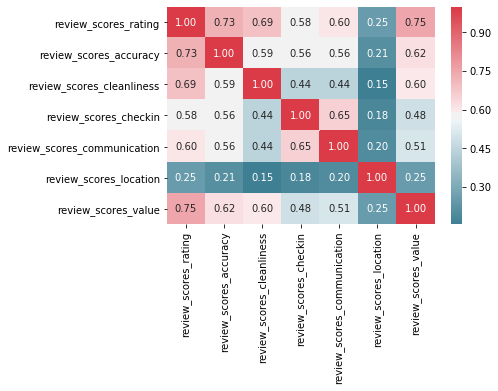

In [384]:
# remove listings with less than 5 reviews
listings_more_than_10_reviews = listings[listings['number_of_reviews'] > 4]

# calculate the correlation factor review ratings
ratings = listings_more_than_10_reviews[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
ratings_corr = ratings.dropna().corr()

colormap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(ratings_corr, cmap=colormap, annot=True, fmt=".2f")
plt.show()

### <a class="anchor" id="Question-II">Question II: What are the neighborhoods the highest average prices?</a>

In [385]:
# Clean the price data by removing $ and ',' from the listing data
listings['price'] = listings['price'].str.replace('([$,])', '').astype(float)

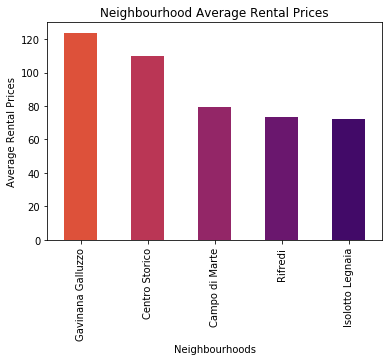

In [386]:
# Calculate the average price by neighbourhood
neighbourhood_cleansed_avg_price = listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False)

# Visualize the result
color = cm.inferno_r(np.linspace(.4,.8, 5))
ax = neighbourhood_cleansed_avg_price.plot(kind='bar', title="Neighbourhood Average Rental Prices", stacked=True, color=color, legend=False);
ax.set_xlabel("Neighbourhoods");
ax.set_ylabel("Average Rental Prices");

### <a class="anchor" id="Question-III">Question III: What is the time of the year has the highest rental prices?</a>


In [387]:
# Clean the price data by removing $ and ',' from the calendar data
calendar['price'], calendar['adjusted_price'] = calendar['price'].str.replace('([$,])', '').astype(float), calendar['adjusted_price'].str.replace('([$,])', '').astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
calendar_by_month = calendar.drop(['available', 'minimum_nights', 'maximum_nights'], axis=1).groupby(calendar['date'].dt.strftime('%Y-%m'))

In [388]:
# Calculate the percentage of the increase in listing prices
diff = calendar_by_month.apply(lambda group: 100 * (group['adjusted_price'] - group['price']) / group['price'])

In [389]:
# Calculate the mean of percentage of the increase in listing prices
total_diff = diff.mean(level=0)

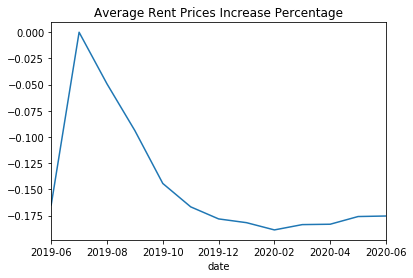

In [390]:
# Visualize the result
total_diff.plot(title="Average Rent Prices Increase Percentage")
plt.show()